# Loss functions
>  In this chapter you will discover the conceptual framework behind logistic regression and SVMs. This will let you delve deeper into the inner workings of these models.

- toc: true 
- badges: true
- comments: true
- author: Lucas Nunes
- categories: [Datacamp]
- image: images/datacamp/___

> Note: This is a summary of the course's chapter 2 exercises "Linear Classifiers in Python" at datacamp. <br>[Github repo](https://github.com/lnunesAI/Datacamp/) / [Course link](https://www.datacamp.com/tracks/machine-learning-scientist-with-python)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Linear classifiers: the coefficients

### How models make predictions
 

<pre>
Possible Answers

Logistic regression only

Linear SVMs only

Neither

<b>Both logistic regression and Linear SVMs</b>

</pre>

**Furthermore, since logistic regression and SVMs are both linear classifiers, the raw model output is a linear function of x.**

### Changing the model coefficients


<div class=""><p>When you call <code>fit</code> with scikit-learn, the logistic regression coefficients are automatically learned from your dataset. In this exercise you will explore how the decision boundary is represented by the coefficients. To do so, you will change the coefficients manually (instead of with <code>fit</code>), and visualize the resulting classifiers.</p>
<p>A 2D dataset is already loaded into the environment as <code>X</code> and <code>y</code>, along with a linear classifier object <code>model</code>.</p></div>

In [8]:
#@title ⠀ { display-mode: "form" }
from sklearn.linear_model import LogisticRegression

X = np.array([[ 1.78862847,  0.43650985],
       [ 0.09649747, -1.8634927 ],
       [-0.2773882 , -0.35475898],
       [-3.08274148,  2.37299932],
       [-3.04381817,  2.52278197],
       [-1.31386475,  0.88462238],
       [-2.11868196,  4.70957306],
       [-2.94996636,  2.59532259],
       [-3.54535995,  1.45352268],
       [ 0.98236743, -1.10106763],
       [-1.18504653, -0.2056499 ],
       [-1.51385164,  3.23671627],
       [-4.02378514,  2.2870068 ],
       [ 0.62524497, -0.16051336],
       [-3.76883635,  2.76996928],
       [ 0.74505627,  1.97611078],
       [-1.24412333, -0.62641691],
       [-0.80376609, -2.41908317],
       [-0.92379202, -1.02387576],
       [ 1.12397796, -0.13191423]])
y = np.array([-1, -1, -1,  1,  1, -1,  1,  1,  1, -1, -1,  1,  1, -1,  1, -1, -1, -1, -1, -1])

model = LogisticRegression()
model.fit(X, y)

def plot_classifier(X, y, clf, ax=None, ticks=False, proba=False, lims=None): # assumes classifier "clf" is already fit
    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1, lims=lims)

    if ax is None:
        plt.figure()
        ax = plt.gca()
        show = True
    else:
        show = False

    # can abstract some of this into a higher-level function for learners to call
    cs = plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8, proba=proba)
    if proba:
        cbar = plt.colorbar(cs)
        cbar.ax.set_ylabel('probability of red $\Delta$ class', fontsize=20, rotation=270, labelpad=30)
        cbar.ax.tick_params(labelsize=14)
    #ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=30, edgecolors='k', linewidth=1)
    labels = np.unique(y)
    if len(labels) == 2:
        ax.scatter(X0[y==labels[0]], X1[y==labels[0]], cmap=plt.cm.coolwarm, s=60, c='b', marker='o', edgecolors='k')
        ax.scatter(X0[y==labels[1]], X1[y==labels[1]], cmap=plt.cm.coolwarm, s=60, c='r', marker='^', edgecolors='k')
    else:
        ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=50, edgecolors='k', linewidth=1)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
#     ax.set_xlabel(data.feature_names[0])
#     ax.set_ylabel(data.feature_names[1])
    if ticks:
        ax.set_xticks(())
        ax.set_yticks(())
#     ax.set_title(title)
    if show:
        plt.show()
    else:
        return ax
def make_meshgrid(x, y, h=.02, lims=None):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """

    if lims is None:
        x_min, x_max = x.min() - 1, x.max() + 1
        y_min, y_max = y.min() - 1, y.max() + 1
    else:
        x_min, x_max, y_min, y_max = lims
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy
def plot_contours(ax, clf, xx, yy, proba=False, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    if proba:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,-1]
        Z = Z.reshape(xx.shape)
        out = ax.imshow(Z,extent=(np.min(xx), np.max(xx), np.min(yy), np.max(yy)), origin='lower', vmin=0, vmax=1, **params)
        ax.contour(xx, yy, Z, levels=[0.5])
    else:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        out = ax.contourf(xx, yy, Z, **params)
    return out

Instructions
<ul>
<li>Set the two coefficients and the intercept to various values and observe the resulting decision boundaries.</li>
<li>Try to build up a sense of how the coefficients relate to the decision boundary.</li>
<li>Set the coefficients and intercept such that the model makes no errors on the given training data.</li>
</ul>

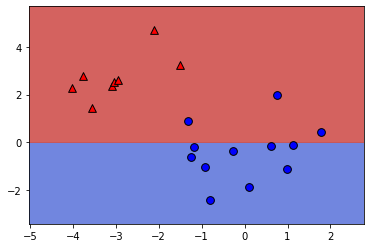

Number of errors: 3


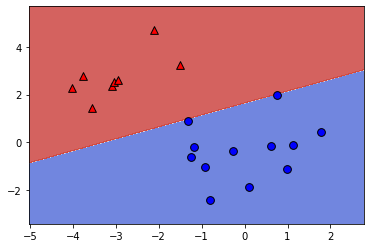

Number of errors: 0


In [14]:
# Set the coefficients
model.coef_ = np.array([[0,1]])
model.intercept_ = np.array([0])
plot_classifier(X,y,model)
num_err = np.sum(y != model.predict(X))
print("Number of errors:", num_err)

# Set the coefficients
model.coef_ = np.array([[-1,2]])
model.intercept_ = np.array([-3.3])

# Plot the data and decision boundary
plot_classifier(X,y,model)

# Print the number of errors
num_err = np.sum(y != model.predict(X))
print("Number of errors:", num_err)

**As you've been experiencing, the coefficients determine the slope of the boundary and the intercept shifts it.**

## What is a loss function?


### The 0-1 loss


In the figure below, what is the 0-1 loss (number of classification errors) of the classifier?



<pre>
Possible Answers

0

1

<b>2</b>

3

</pre>

**There is 1 misclassified red point and 1 misclassified blue point.**

### Minimizing a loss function


<div class=""><p>In this exercise you'll implement linear regression "from scratch" using <code>scipy.optimize.minimize</code>.</p>
<p>We'll train a model on the Boston housing price data set, which is already loaded into  the variables <code>X</code> and <code>y</code>. For simplicity, we won't include an intercept in our regression model.</p></div>

In [55]:
from scipy.optimize import minimize
from sklearn.linear_model import LinearRegression

In [17]:
df = pd.read_csv('https://raw.githubusercontent.com/lnunesAI/Datacamp/main/2-machine-learning-scientist-with-python/3-linear-classifiers-in-python/datasets/boston_df.csv')

In [51]:
X = df.iloc[:, 1:].values
y = df.iloc[:, :1].values

Instrctions
<ul>
<li>Fill in the loss function for least squares linear regression.</li>
<li>Print out the coefficients from fitting sklearn's <code>LinearRegression</code>.</li>
</ul>

In [56]:
# The squared error, summed over training examples
def my_loss(w):
    s = 0
    for i in range(y.size):
        # Get the true and predicted target values for example 'i'
        y_i_true = y[i]
        y_i_pred = w@X[i]
        s = s + (y_i_true - y_i_pred)**2
    return s

# Returns the w that makes my_loss(w) smallest
w_fit = minimize(my_loss, X[0]).x
print(w_fit)

# Compare with scikit-learn's LinearRegression coefficients
lr = LinearRegression(fit_intercept=False).fit(X,y)
print(lr.coef_)

[-9.16308289e-02  4.86754323e-02 -3.77591068e-03  2.85634737e+00
 -2.88076035e+00  5.92522143e+00 -7.22461910e-03 -9.67996625e-01
  1.70448131e-01 -9.38963186e-03 -3.92422169e-01  1.49830962e-02
 -4.16972016e-01]
[[-9.16297843e-02  4.86751203e-02 -3.77930006e-03  2.85636751e+00
  -2.88077933e+00  5.92521432e+00 -7.22447929e-03 -9.67995240e-01
   1.70443393e-01 -9.38925373e-03 -3.92425680e-01  1.49832102e-02
  -4.16972624e-01]]


**This was a tough one. Isn't it cool how you reproduce the weights learned by scikit-learn?**

## Loss function diagrams

### Classification loss functions


<div class=""><p>Which of the four loss functions makes sense for classification?</p>
<p><img src="https://s3.amazonaws.com/assets.datacamp.com/production/course_6199/datasets/multiple_choice_loss_diagram.png" alt=""></p></div>

<pre>
Possible Answers

(1)

<b>(2)</b>

(3)

(4)

</pre>

**This loss is very similar to the hinge loss used in SVMs (just shifted slightly.**

### Comparing the logistic and hinge losses


<div class=""><p>In this exercise you'll create a plot of the logistic and hinge losses using their mathematical expressions, which are provided to you.</p>
<p>The loss function diagram from the video is shown on the right.</p></div>

Instructions
<li>Evaluate the <code>log_loss()</code> and <code>hinge_loss()</code> functions <strong>at the grid points</strong> so that they are plotted.</li>

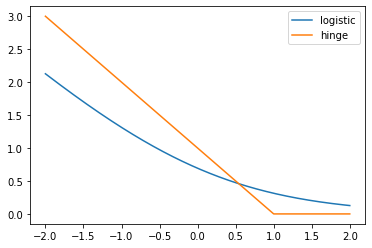

In [59]:
# Mathematical functions for logistic and hinge losses
def log_loss(raw_model_output):
   return np.log(1+np.exp(-raw_model_output))
def hinge_loss(raw_model_output):
   return np.maximum(0,1-raw_model_output)

# Create a grid of values and plot
grid = np.linspace(-2,2,1000)
plt.plot(grid, log_loss(grid), label='logistic')
plt.plot(grid, hinge_loss(grid), label='hinge')
plt.legend()
plt.show()

**Como você pode ver, eles correspondem aos diagramas de função de perda que vimos no vídeo.**

### Implementing logistic regression


<div class=""><p>This is very similar to the earlier exercise where you implemented linear regression "from scratch" using <code>scipy.optimize.minimize</code>. However, this time we'll minimize the logistic loss and compare with scikit-learn's <code>LogisticRegression</code> (we've set <code>C</code> to a large value to disable regularization; more on this in Chapter 3!).</p>
<p>The <code>log_loss()</code> function from the previous exercise is already defined in your environment, and the <code>sklearn</code> breast cancer prediction dataset (first 10 features, standardized) is loaded into the variables <code>X</code> and <code>y</code>.</p></div>

In [61]:
df = pd.read_csv('https://raw.githubusercontent.com/lnunesAI/Datacamp/main/2-machine-learning-scientist-with-python/3-linear-classifiers-in-python/datasets/breast_df.csv')

In [101]:
y = df.iloc[: :,-1].values
X = df.drop('y', 1).values

Instructions
<ul>
<li>Input the number of training examples into <code>range()</code>.</li>
<li>Fill in the loss function for logistic regression.</li>
<li>Compare the coefficients to sklearn's <code>LogisticRegression</code>.</li>
</ul>

In [102]:
# The logistic loss, summed over training examples
def my_loss(w):
    s = 0
    for i in range(len(y)):
        raw_model_output = w@X[i]
        s = s + log_loss(raw_model_output * y[i])
    return s

# Returns the w that makes my_loss(w) smallest
w_fit = minimize(my_loss, X[0]).x
print(w_fit)

# Compare with scikit-learn's LogisticRegression
lr = LogisticRegression(fit_intercept=False, C=1000000).fit(X,y)
print(lr.coef_)

[ 1.03618598 -1.65378215  4.08304188 -9.40922801 -1.0678652   0.07893518
 -0.85109889 -2.44102996 -0.452856    0.4335353 ]
[[ 1.03665946 -1.65380077  4.08233062 -9.40904867 -1.06787935  0.07901598
  -0.85099843 -2.44107473 -0.45288928  0.43348202]]


**As you can see, logistic regression is just minimizing the loss function we've been looking at. Much more on logistic regression in the next chapter!**